In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import time
from tqdm import tqdm
import seaborn as sns
from IPython import display
import geopandas as gpd

In [2]:
ts1w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts_water.csv', index_col=[0])
ts2w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts_water.csv', index_col=[0])
ts3w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts_water.csv', index_col=[0])
ts4w = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts_water.csv', index_col=[0])
bigTSwater = pd.concat([ts1w, ts2w, ts3w, ts4w], axis=1)
bigTSwaterOG = pd.concat([ts1w, ts2w, ts3w, ts4w], axis=1)

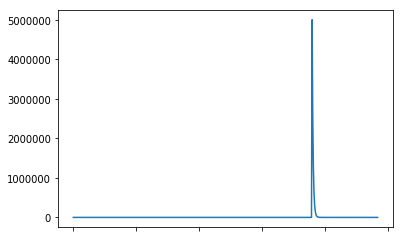

In [3]:
bigTSwater['2320682'].ewm(1).mean().plot(label='rolling')

In [ ]:
#apino = bigTSwater.columns.values[0:500]
apino = bigTSwater.max().sort_values(ascending=True).index.values[0:1000]
for well in tqdm(apino):
    if bigTSwater[well].max() > 0:
        mean = bigTSwater[well].mean()
        q = bigTSwater[well].quantile(0.9999)+1
        bigTSwater.loc[bigTSwater[well]>q, well] = np.nan
        bigTSwater.fillna(mean)
    else:
        pass

 67%|█████████████████████████████████████████████████████▏                         | 674/1000 [03:59<01:55,  2.81it/s]

In [ ]:
bigTSwater.plot(legend=False)


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000020E80223840> (for post_execute):


ValueError: object too deep for desired array

In [ ]:
jacked = ['3520818', '3721090' , '3520849', '3520813', '3520871', '3520846', '3520867', '4120130', '3520890', '1322051', 
          '1322226', '3520873', '3520870', '4522736', '1321362', '1321510', '1320818', '4120322', '4121001', '3520816', '3520750',
          '1321917', '1322127', '3520866', '3520894', '3520862', '4120268', '3520815', '1321756', '4121019']

In [11]:
bigTSwater.max().sort_values(ascending=False).index.values[0:100]

array(['2320682', '3523226', '524825', '320399', '920378', '3520546',
       '1705839', '3721806', '3721815', '3722426', '2505724', '1320227',
       '524412', '1905740', '2505594', '3520218', '1720268', '720558',
       '906410', '3706250', '705507', '2522208', '3721090', '2522247',
       '3722339', '2521975', '2522241', '2705340', '2522248', '2506212',
       '2508115', '1321033', '1320422', '521932', '1121887', '3520587',
       '4521575', '4522263', '1320213', '1320368', '2521275', '1705826',
       '1705627', '1705843', '2520606', '3722439', '1705751', '2506216',
       '1705712', '2520693', '1705756', '538240', '1705716', '1705537',
       '1705738', '2931004', '1720273', '1720944', '1705549', '2920330',
       '1706706', '2506220', '1720275', '2507860', '1720276', '306346',
       '553295', '1705586', '1705650', '3721494', '1720258', '1705792',
       '1705739', '2510778', '320190', '3706196', '320107', '1720317',
       '1720456', '3722359', '1720278', '2930977', '720899', '30

In [12]:
bigTSwater['1705735'].max()

935652.0